#Домашнє завдання до тем apply(), groupby(), pivot_table()

В цьому домашньому завданні продовжуємо працювати з набором даних `supermarket_sales.csv`.

0. Імпортуйте бібліотеку pandas та зчитайте дані у змінну `df` типу `pandas.DataFrame`.

In [10]:
import pandas as pd
data_path = '../data/supermarket_sales.csv'
df = pd.read_csv(data_path)

1. Дослідимо, який філіал супермаркету ('Branch') є найприбутковішим. Для цього знайдіть сумарний прибуток за кожним філіалом і виявіть, який філіал має найвищий.

In [274]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,price_category,rating_category
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,Medium-High,Top
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,Low,Top
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,Medium,Excellent
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,Medium,Top
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,High,Good


In [28]:
df.groupby('Branch')['gross income'].sum().round(2)
#df['gross income'].sum() ---- check for calculation

Branch
A    5057.16
B    5057.03
C    5265.18
Name: gross income, dtype: float64

2. В якому місті знайходиться філіал з найвищим прибутком? Може в тому місці нам розмітисти ще один магазин.  
Знайдіть відповідь за допомогою функціоналу Pandas.

In [103]:
#df.pivot_table(index='City', columns='Branch', values='gross income', aggfunc='sum',margins=True)
#df.pivot_table(index='City', columns='Branch', values='gross income', aggfunc=list)---check for nan

pivot_table = df.pivot_table(index='City', columns='Branch', values='gross income', aggfunc='sum').round(2)
pivot_table['Total'] = pivot_table.sum(axis=1)
pivot_table_sorted = pivot_table.sort_values(by='Total', ascending=False)
first_city = pivot_table_sorted.iloc[0].name
print("Branch with the highest gross income located in the City:", first_city)
print(pivot_table_sorted)
''' Based on this table we cannot answer the question regarding openning more shopd in the city Naypyitaw.
However, I would check the situation with brances, as we have one branch in one city, this is interesting and I would check the reason for that.
Moreover, Brach A,B has almost the same Gross income, in different cities, this is also suspicious coincidence '''

Branch with the highest gross income located in the City: Naypyitaw
Branch           A        B        C    Total
City                                         
Naypyitaw      NaN      NaN  5265.18  5265.18
Yangon     5057.16      NaN      NaN  5057.16
Mandalay       NaN  5057.03      NaN  5057.03


' Based on this table we cannot answer the question regarding openning more shopd in the city Naypyitaw.\nHowever, I would check the situation with brances, as we have one branch in one city, this is interesting and I would check the reason for that.\nMoreover, Brach A,B has almost the same Gross income, in diferrent cities, this is also suspisious circumstance '

3.1. Створіть зводну таблицю, яка покаже, скільки покупок (інвойсів) було зроблено в кожній з філій (`Branch`) за різними категоріями товарів. Запишіть таблицю в змінну `invoices_by_category` і виведіть змінну на екран.
Ця таблиця допоможе проаналізувати, в якій філії купують найбільше товарів кожної з категорій.

In [124]:
invoices_by_category=df.pivot_table(index='Branch', columns='Product line', values='gross income', aggfunc='count')
invoices_by_category

Product line,Electronic accessories,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel
Branch,,,,,,
A,60,51,58,47,65,59
B,55,62,50,53,50,62
C,55,65,66,52,45,45


Очікуваний результат:

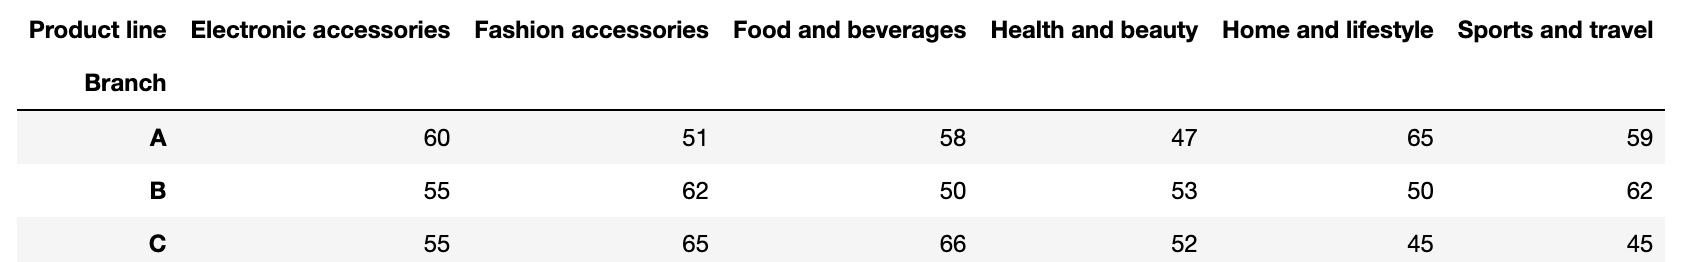

3.2. Викристовуючи змінну `invoices_by_category` дайте відповідь програмно (тобто значення треба не просто знайти очима, а вивести за допомогою коду), в якому філіалі магазину (`Branch`) найбільше інвойсів із покупкою товарів категорії "Електронні аксесуари" (`Electronic accessories`)?


In [133]:

top_el_branch = invoices_by_category['Electronic accessories'].idxmax()
print("The largest number of invoices in the Electronic accessories section is in the Branch:", top_el_branch)

The largest number of invoices in the Electronic accessories section is in the Branch: A


4-6. **Творче завдання на розвиток аналітичного мислення**

Крок 1. Сформулюйте ТРИ питання (гіпотези) до наявних даних, які допомогли б вам зрозуміти, які користувачі що, де та коли найбільше/найменше купують, аби дати на основі цих гіпотез рекомендації бізнесу. Звісно питання мають бути не тими, на які ми вже відповіли в завданнях модулю.

Крок 2. Знайдіть відповіді на свої питання з допомогою функціоналу pandas.

Крок 3. Напишіть, як відповідь на це питання може бути використана для прийняття бізнес рішень.   
   
 Питання можуть бути будь-якої складності, але їх має бути 3. Кожне питання оцінюється як 1 завдання. Без виконання цього завдання ДЗ не приймається. Якщо є питання щодо виконання - пишіть у чат 🙌


1. I suppose male buy more electronic and sport accessories than female
2. I suppose cheaper goods has higher sales 
3. I believe goods with higher rating has higher sales (price is less important)

In [199]:
# 1.
gender=df.pivot_table(index='Gender', columns='Product line', values='gross income', aggfunc='count', margins=True)
print(gender)
'''
Hypothesis failed,what means that promoting of these good should not consentrated only on male. 
Top woman category is fashion and accessories, top man category is health and beaty. 
I would recommend to check closer sales strategy in fashion and accessories, as it gives us highest 
gross income, possibly some practices can be used in promoting other categories
'''

Product line  Electronic accessories  Fashion accessories  Food and beverages  \
Gender                                                                          
Female                            84                   96                  90   
Male                              86                   82                  84   
All                              170                  178                 174   

Product line  Health and beauty  Home and lifestyle  Sports and travel   All  
Gender                                                                        
Female                       64                  79                 88   501  
Male                         88                  81                 78   499  
All                         152                 160                166  1000  


'\nHypothesis failed,what means that promoting of these good should not consentrated only on male. \nTop woman category is fashion and accessories, top man category is health and beaty. \nI would recommend to check closer sales strategy in fashion and accessories, as it gives us highest \ngross income, possibly some practices can be used in promoting other categories\n'

In [219]:
#2.

def price_grouping(val): 
    if val <= 20:
        return 'Low'
    elif val <= 40:
        return 'Medium-Low'
    elif val <= 60:
        return 'Medium'
    elif val <= 80:
        return 'Medium-High'
    else:
        return 'High'
df['price_category'] = df['Unit price'].apply(price_grouping)
df[['Unit price', 'price_category']]
grouped=df.groupby('price_category')['Invoice ID'].count()
sorted_group = grouped.sort_values() 
print(sorted_group)
''' Hypothesis failed,expensive goods are selling the best.However interesting thing in here is that 
cheap goods with the price less than 20 have a significant drop in sales, at least twice less than 
in the other categories. I would focus attention on this, maybe price increase for this goods will
stimulate demand on this goods ?! 
To overall, price is not the stopper for customer.More information we can get on hipothesis 3'''

price_category
Low            106
Medium         215
Medium-High    221
Medium-Low     226
High           232
Name: Invoice ID, dtype: int64


' Hypothesis failed,expensive goods are selling the best.However interesting thing in here is that \ncheap goods with the price less than 20 have a significant drop in sales, at least twice less than \nin the other categories. I would focus attention on this, maybe price increase for this goods will\nstimulate demand on this goods ?! \nTo overall, price is not the stopper for customer.More information we can get on hipothesis 3'

In [267]:
#3.
df['price_category']

def rating_grouping(val): 
    if val <= 2:
        return 'Poor'
    elif val <= 4:
        return 'Fair'
    elif val <= 6:
        return 'Good'
    elif val <= 8:
        return 'Excellent'
    else:
        return 'Top'
df['rating_category'] = df.Rating.apply(rating_grouping)
df[['Rating', 'rating_category']]

rating_p=df.pivot_table(index='rating_category', columns='price_category', values='gross income', aggfunc='count', margins=True)
sorted_group = rating_p.sort_values(by=['rating_category'],ascending=[True])
#sorted_group2 = rating_p.sort_values(by=['rating_category','price_category'])#, ascending=[True, False]) 
rating_p
"""How to solve an error with 'price_category' in sorted_group2?
It does not work with pivot columns and in general it did not work like in previous so solting failed
"""
sorted_group


price_category,High,Low,Medium,Medium-High,Medium-Low,All
rating_category,,,,,,
All,232.0,106.0,215.0,221.0,226.0,1000
Excellent,85.0,36.0,71.0,71.0,88.0,351
Fair,2.0,NaN,4.0,4.0,1.0,11
Good,72.0,34.0,66.0,88.0,70.0,330
Top,73.0,36.0,74.0,58.0,67.0,308


Hypothesis approved
As we can can see, we do not have goods/items with low rating, which is good in term of the goods quality.
Top sales are in categories:
-upder the prices range Medium-Low (20-40) and Excellent rating (6-8)
-upder the prices range Medium-High (40-60) and Good rating (4-6)
Significat drop in sales are observed for products with a rating below 4.
To overall, I can assume that business should care a lot about rating, as goods with rating 0-4 do not have demand, even if the price is Low (zero purchased).